## Ford goBike Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1)

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
df.shape

(183412, 16)

### What is the structure of your dataset?

##### the dataset has 183412 raws and 16 columns 

### What is/are the main feature(s) of interest in your dataset?
>  - member_gender
   -bike id 
   -user id
   ......
   ....
   
   


#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

#### - user Type
####  - memberbirth year

# Cleaning Data

In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

##### drop nan values

In [7]:
df.dropna(axis = 0, inplace=True)

##### check duplicated rows 

In [5]:
df.duplicated().sum()

0

#### No dublicated rows

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


###### Changing Data type

In [13]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['member_birth_year'] = df['member_birth_year'].astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int32
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
dtypes: category(2), datetime64[ns](2), float64(4), int32(1), int64

##### Adding new features

In [21]:
df['duration_minute'] = df['duration_sec']/60
df['start_hourofday'] = df.start_time.dt.strftime('%H')
df['start_dayofweek'] = df.start_time.dt.strftime('%A')

In [20]:
df['member_age'] = 2021 - df['member_birth_year']
df['member_age'] = df['member_age'].astype('int')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 20 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int32
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
duration_minute            174952 non-null float64
start_hourofday 

In [23]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_minute,member_age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,11.733379,36.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,27.370082,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,20.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.383333,29.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,8.500000,34.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,13.150000,41.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1409.133333,143.000000


In [31]:
for col in df.columns:
    print(f'For column {col}\n------------------\n')
    print(df[col].value_counts())
    print('\n')

For column duration_sec
------------------

272      308
323      285
305      282
369      280
274      276
306      276
354      275
324      275
344      274
380      274
387      273
297      273
343      270
336      269
366      269
270      269
264      269
325      268
337      267
315      267
329      267
341      266
444      266
339      264
269      264
280      264
377      264
287      263
384      263
318      263
        ... 
3113       1
11614      1
2726       1
55868      1
3751       1
5081       1
2855       1
5028       1
6254       1
3111       1
5284       1
8175       1
7589       1
8047       1
21954      1
5337       1
34008      1
3017       1
1958       1
4007       1
14368      1
4133       1
5465       1
2342       1
17600      1
3145       1
7791       1
14880      1
3418       1
10661      1
Name: duration_sec, Length: 4429, dtype: int64


For column start_time
------------------

2019-02-07 17:56:08.897    2
2019-02-19 17:52:44.175    2
2019-02-15 08:

4794    179
4814    172
5175    167
4450    166
5145    165
5482    164
4422    163
4956    162
4812    162
4834    162
4773    161
5048    160
5274    159
5014    157
5325    157
4767    156
4653    156
5351    156
4742    154
5034    154
5218    154
4923    154
5343    153
4877    153
4728    153
5286    152
4611    151
5392    151
4927    151
4741    151
       ... 
598       1
3222      1
772       1
6173      1
1939      1
2996      1
3103      1
350       1
2631      1
1371      1
2194      1
3518      1
1536      1
362       1
599       1
302       1
3002      1
1317      1
1397      1
5994      1
96        1
2526      1
3395      1
5777      1
6271      1
681       1
6601      1
2808      1
5067      1
1906      1
Name: bike_id, Length: 4607, dtype: int64


For column user_type
------------------

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64


For column member_birth_year
------------------

1988    10214
1993     9323
1989     8967
1990     8640
1991

##### Data Visualization

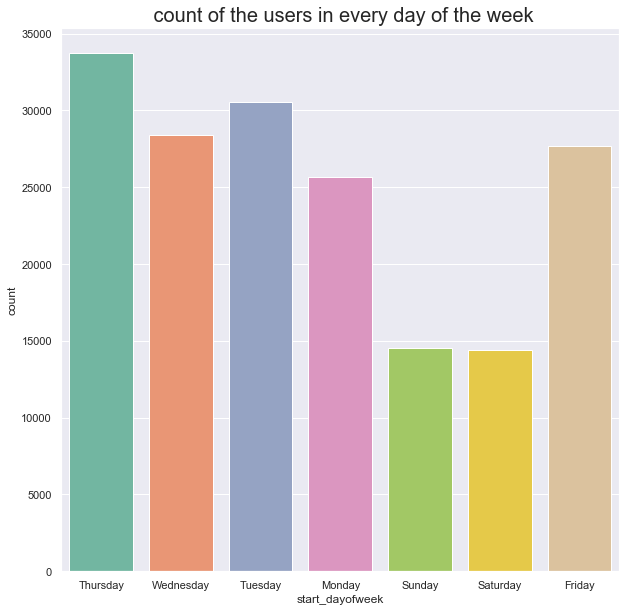

In [37]:
sns.countplot(x='start_dayofweek', data=df, palette='Set2').set_title(" count of the users in every day of the week",size=20);

##### highest count : Thursday
##### lowest count : Sunday

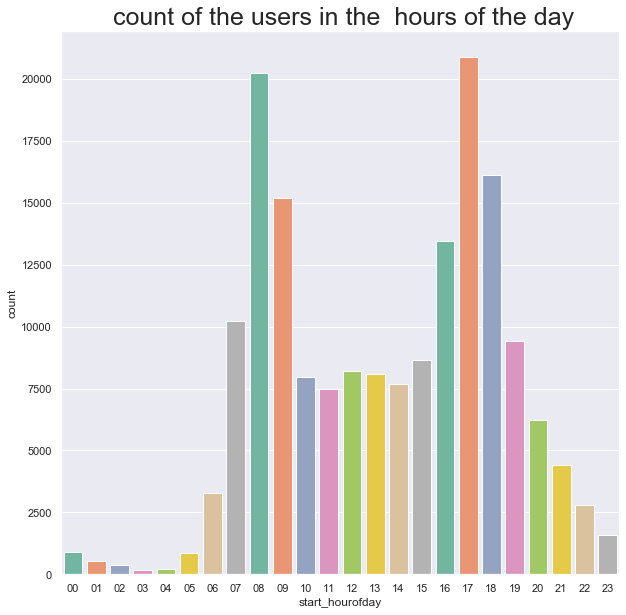

In [38]:
sns.countplot(x='start_hourofday', data=df, palette='Set2').set_title(" count of the users in the  hours of the day",size=25);


#### highest hour : 5 pm
#### lowest hour : 3 Am

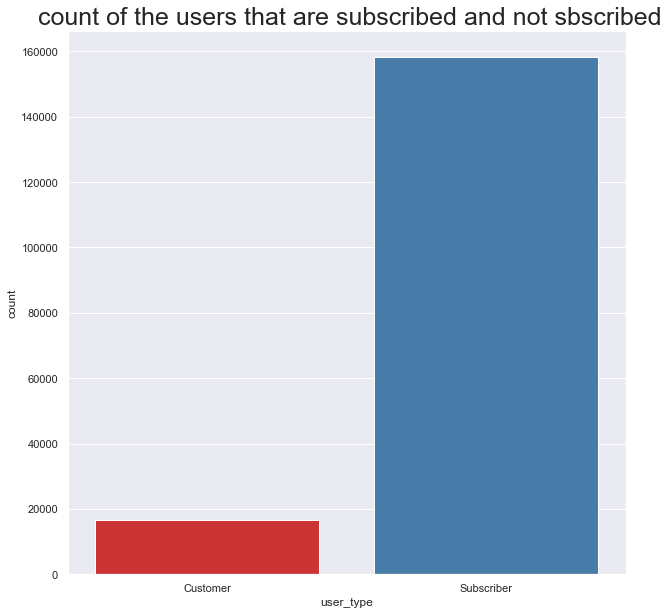

In [39]:
sns.countplot(x='user_type', data=df, palette='Set1').set_title(" count of the users that are subscribed and not sbscribed",size=25);

#### huge variance of count in the number of subscribers vs the normal customers

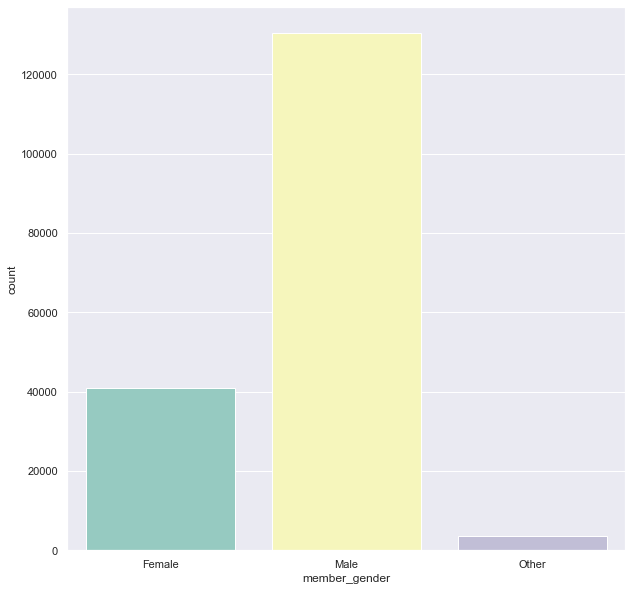

In [40]:
sns.countplot(x='member_gender', data=df, palette='Set3')

#### Male bikers is greatest count 

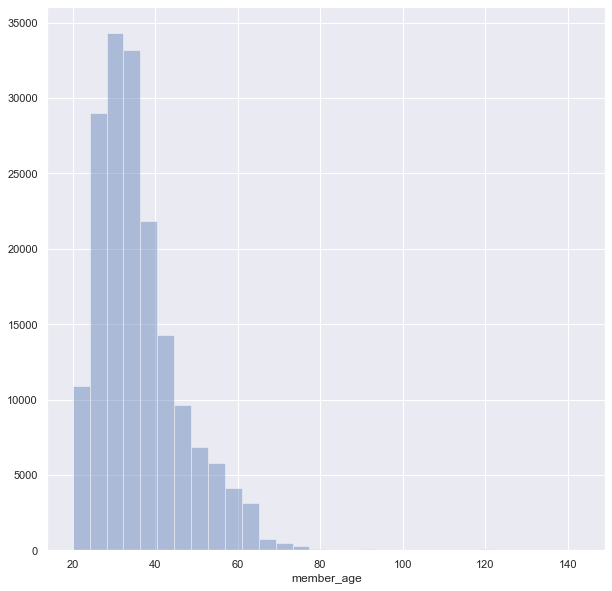

In [30]:
age=sns.distplot(df['member_age'],kde=False, bins=30);


##### in the figure it shows that the most age is between 30-40

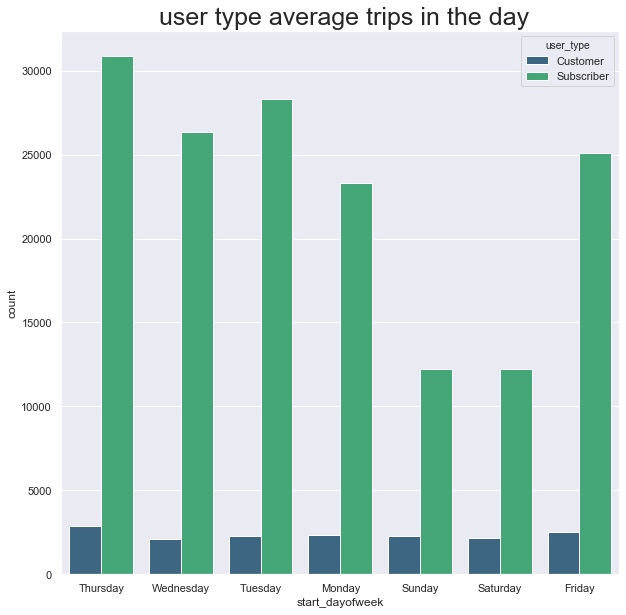

In [44]:
sns.countplot(x='start_dayofweek', data=df, hue='user_type', palette='viridis').set_title(" user type average trips in the day",size=25);

##### customers doesn't have a very high day in the number of trips unlike the subscribers which means that Subscribers likes to take bike trips almost all weekdays

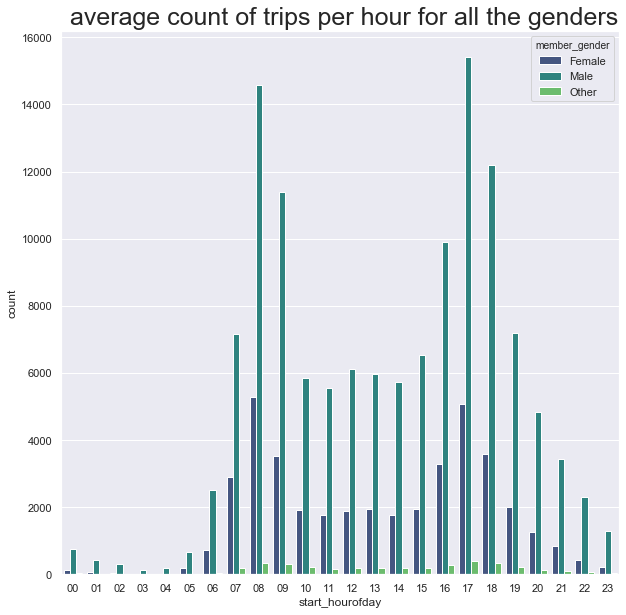

In [45]:
sns.countplot(x='start_hourofday', data=df, hue='member_gender', palette='viridis').set_title(" average count of trips per hour for all the genders",size=25);

##### female rides starts to get low starting from 11PM to 4 AM as it reches very low count in the trips at the hours between 2 to 4 AM

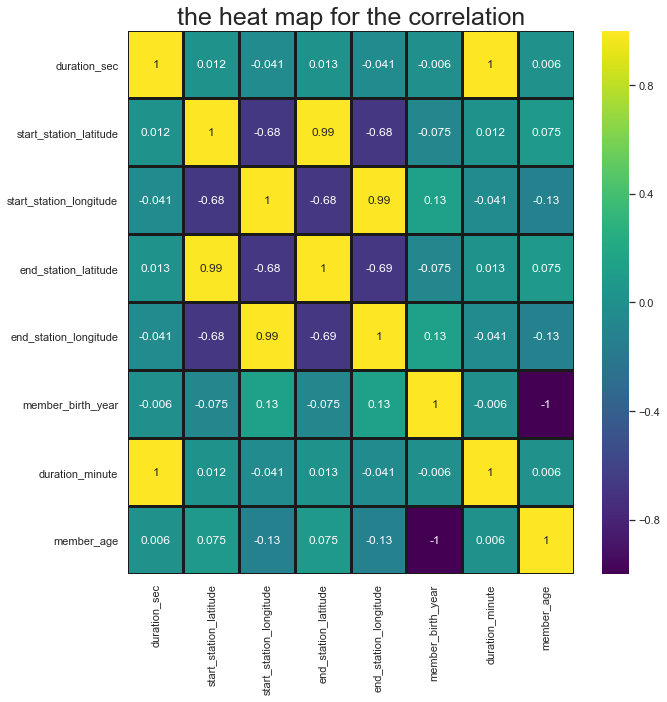

In [48]:
sns.heatmap(df.corr(), cmap='viridis', linecolor='k', linewidths=2, annot=True).set_title("the heat map for the correlation",size=25);

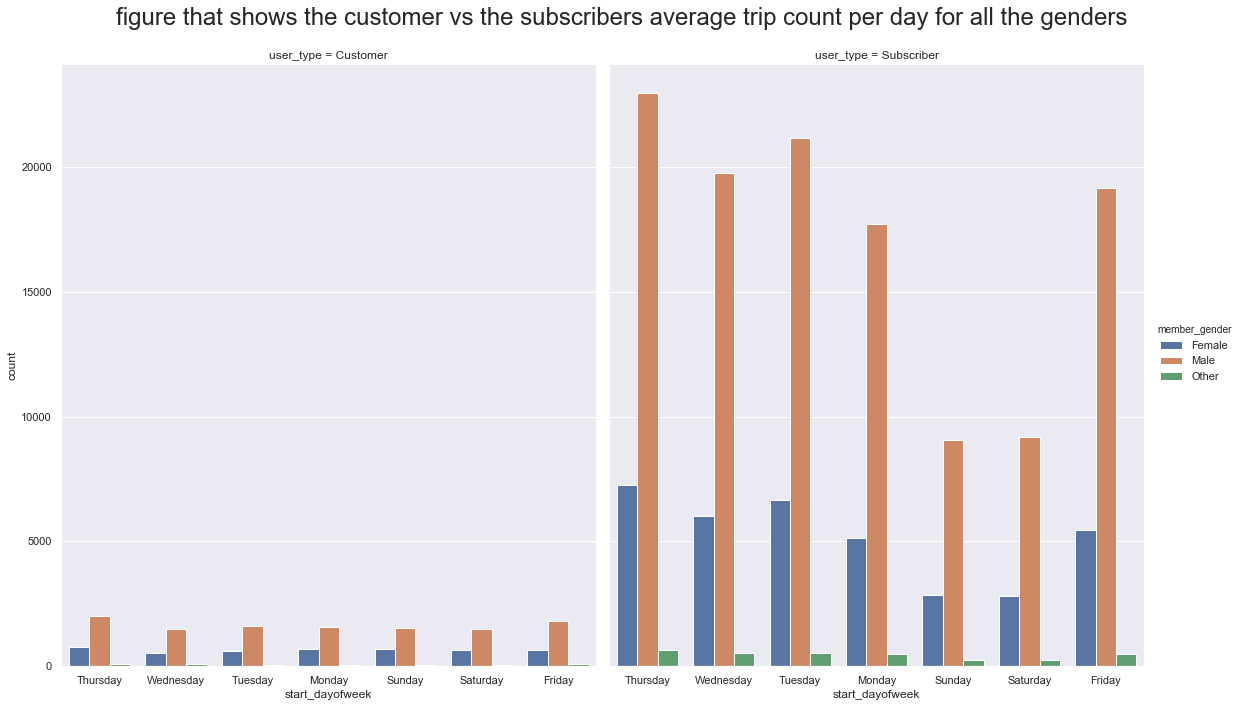

In [49]:
g = sns.catplot(x="start_dayofweek", hue="member_gender", col="user_type",
                data=df, kind="count",
                height=10, aspect=0.8);
g.fig.suptitle("figure that shows the customer vs the subscribers average trip count per day for all the genders",fontsize=24, fontdict={"weight": "bold"});
g.fig.subplots_adjust(top=.9)

##### The figure Shows that almost all the week day has the same numbers of customers in all the genders unlike the subscribers figures which shows peak and low count numbers in the weekdays